## **Number Detection**

In [1]:
from skimage import feature
from imutils import paths
import numpy as np
import argparse
import cv2 as cv
import os
import pandas as pd
from google.colab.patches import cv2_imshow

**Metode Preprocessing**

In [2]:
def preprocess(image, image_size=128):
		image = cv.cvtColor(image, cv.COLOR_BGR2GRAY) # Ubah mehjadi grayscale
		image = cv.resize(image, (image_size, image_size)) # Resize gambar menjadi suatu ukuran (default = 128)

		image = cv.threshold(image, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1] # Melakukan thresholding dan mengambil hasil gambar thresholding

		return image

**Feature Extraction**

In [3]:
# From: https://www.pyimagesearch.com/2019/04/29/detecting-parkinsons-disease-with-opencv-computer-vision-and-the-spiral-wave-test/
def quantify_image_hog(image): # Histogram of Oriented Gradient features
	features = feature.hog(image, orientations=9, pixels_per_cell=(10, 10), cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1")

	return features

In [4]:
# From: https://www.pyimagesearch.com/2015/12/07/local-binary-patterns-with-python-opencv/
def quantify_image_lbp(image): # Local Binary Pattern features
  features = feature.local_binary_pattern(image, 24, 8, method="uniform")

  (hist, _) = np.histogram(features.flatten(), bins=np.arange(0, 27), range=(0, 26))

  hist = hist.astype("float")
  hist /= (hist.sum() + 1e-7)

  return hist

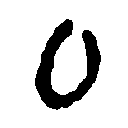

HOG
[0. 0. 0. ... 0. 0. 0.] 4356
LBP
[0.         0.         0.         0.         0.         0.
 0.         0.00219727 0.00146484 0.00415039 0.0045166  0.00933838
 0.01397705 0.09973145 0.01867676 0.0512085  0.01879883 0.07513428
 0.01824951 0.04785156 0.01141357 0.04107666 0.0057373  0.01098633
 0.55584717 0.00964355] 26


In [5]:
# Test

image_test = cv.imread('drive/My Drive/Colab Test (Bootcamp ML 2020)/numbers_dataset/training/0/img_10007.jpg')

image_test_preprocessed = preprocess(image_test, image_size=128)

cv2_imshow(image_test)
cv2_imshow(image_test_preprocessed)

features_hog = quantify_image_hog(image_test_preprocessed)
features_lbp = quantify_image_lbp(image_test_preprocessed)

print("HOG")
print(features_hog, len(features_hog))
print("LBP")
print(features_lbp, len(features_lbp))

**Split Dataset**

In [6]:
def load_split(path, image_size=200, extraction_method='hog'):
  image_paths = list(paths.list_images(path))
  data = []
  labels = []

  for image_path in image_paths:
    label = image_path.split(os.path.sep)[-2]

    image = cv.imread(image_path)
    image = preprocess(image, image_size=image_size)

    if extraction_method == 'hog':
      features = quantify_image_hog(image)
    if extraction_method == 'lbp':
      features = quantify_image_lbp(image)

    data.append(features)
    labels.append(label)

  return (np.array(data), np.array(labels))

**Load Dataset**

In [7]:
dataset_dir = 'drive/My Drive/Colab Test (Bootcamp ML 2020)/numbers_dataset'

trainingPath = os.path.join(dataset_dir, 'training')
testingPath = os.path.join(dataset_dir, 'testing')

**Atur Ukuran Image & Metode Feature Extraction**

### **HOG dengan image size 128**

In [8]:
resize_image_size = 128 # Masing-masing gambar perlu diresize menjadi suatu ukuran yang tetap
extraction_method = 'hog' #lbp atau hog

**Split Dataset**

In [9]:
(X_train, y_train) = load_split(trainingPath, image_size=resize_image_size, extraction_method=extraction_method)
(X_test, y_test) = load_split(testingPath, image_size=resize_image_size, extraction_method=extraction_method)

print('Data sudah diupload!')

Data sudah diupload!


**Label Encoding**

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [12]:
y_train

array([1, 1, 1, ..., 0, 0, 0])

In [13]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score

**Machine Learning Model**

**1. LinearSVC**

In [15]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import RandomizedSearchCV

In [16]:
C = [int(x) for x in np.linspace(0, 50, 25)]

In [17]:
linsvc_grid = {'C' : C}

In [18]:
linsvc = LinearSVC()
lin_random = RandomizedSearchCV(estimator=linsvc, param_distributions=linsvc_grid, n_iter=100, cv=3, verbose=2, random_state=10, n_jobs=-1)
lin_random.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 25 is smaller than n_iter=100. Running 25 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   17.5s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                       fit_intercept=True, intercept_scaling=1,
                                       loss='squared_hinge', max_iter=1000,
                                       multi_class='ovr', penalty='l2',
                                       random_state=None, tol=0.0001,
                                       verbose=0),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0, 2, 4, 6, 8, 10, 12, 14, 16, 18,
                                              20, 22, 25, 27, 29, 31, 33, 35,
                                              37, 39, 41, 43, 45, 47, 50]},
                   pre_dispatch='2*n_jobs', random_state=10, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [19]:
lin_random.best_params_

{'C': 2}

In [20]:
lin_svc = LinearSVC(C=2)
lin_svc.fit(X_train, y_train)
prediksi_linsvc = lin_svc.predict(X_test)
cm = confusion_matrix(y_test, prediksi_linsvc)
cr = classification_report(y_test, prediksi_linsvc)
print('Nilai akurasi LinearSVC pada testing data adalah {:.3f}'.format(lin_svc.score(X_test, y_test)))
print('Nilai F1 Score LinearSVC pada testing data adalah {:.3f}'.format(f1_score(y_test, prediksi_linsvc, average='macro')))
print('Nilai Precision Score LinearSVC pada testing data adalah {:.3f}'.format(precision_score(y_test, prediksi_linsvc, average='macro')))
print('Nilai Recall Score LinearSVC pada testing data adalah {:.3f}'.format(recall_score(y_test, prediksi_linsvc, average='macro')))
print()
print(cr)
print(cm)

Nilai akurasi LinearSVC pada testing data adalah 0.994
Nilai F1 Score LinearSVC pada testing data adalah 0.994
Nilai Precision Score LinearSVC pada testing data adalah 0.994
Nilai Recall Score LinearSVC pada testing data adalah 0.994

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       300
           1       1.00      1.00      1.00       300
           2       1.00      0.99      0.99       300

    accuracy                           0.99       900
   macro avg       0.99      0.99      0.99       900
weighted avg       0.99      0.99      0.99       900

[[299   0   1]
 [  1 299   0]
 [  2   1 297]]


In [21]:
testing_paths = list(paths.list_images(testingPath))
images = []

for testing_path in testing_paths[590:620]:
	image = cv.imread(testing_path)
	output = image.copy()
	output = cv.resize(output, (128, 128))

	image = preprocess(image, image_size=resize_image_size)

	if extraction_method == 'hog':
		features = quantify_image_hog(image)
	elif extraction_method == 'lbp':
		features = quantify_image_lbp(image)
   
	preds = lin_svc.predict([features])
	label = le.inverse_transform(preds)[0]

	color = (0, 255, 0) if label == "1" else (0, 0, 255)
	cv.putText(output, label, (3, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
	images.append(output)

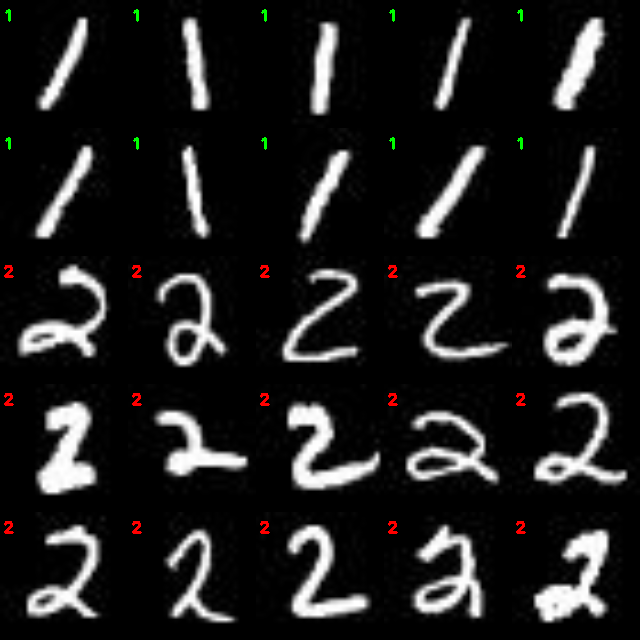

In [22]:
from imutils import build_montages

montage = build_montages(images, (128, 128), (5, 5))[0]

cv2_imshow(montage)

**2. Logistic Regression**

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
penalty = ['l1', 'l2']
C = np.logspace(-4, 4, 20)

In [25]:
log_grid = {'penalty' : penalty, 'C' : C}

In [26]:
logreg = LogisticRegression()
log_random = RandomizedSearchCV(estimator=logreg, param_distributions=log_grid, n_iter=100, cv=3, verbose=2, random_state=10, n_jobs=-1)
log_random.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 40 is smaller than n_iter=100. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  3.9min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'C': a...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+

In [27]:
log_random.best_params_

{'C': 0.615848211066026, 'penalty': 'l2'}

In [28]:
logreg = LogisticRegression(C=0.615848211066026, penalty='l2')
logreg.fit(X_train, y_train)
prediksi_logreg = logreg.predict(X_test)
cm = confusion_matrix(y_test, prediksi_logreg)
cr = classification_report(y_test, prediksi_logreg)
print('Nilai akurasi Logistic Regression pada testing data adalah {:.3f}'.format(logreg.score(X_test, y_test)))
print('Nilai F1 Score Logistic Regression pada testing data adalah {:.3f}'.format(f1_score(y_test, prediksi_logreg, average='macro')))
print('Nilai Precision Score Logistic Regression pada testing data adalah {:.3f}'.format(precision_score(y_test, prediksi_logreg, average='macro')))
print('Nilai Recall Score Logistic Regression pada testing data adalah {:.3f}'.format(recall_score(y_test, prediksi_logreg, average='macro')))
print()
print(cr)
print(cm) 

Nilai akurasi Logistic Regression pada testing data adalah 0.992
Nilai F1 Score Logistic Regression pada testing data adalah 0.992
Nilai Precision Score Logistic Regression pada testing data adalah 0.992
Nilai Recall Score Logistic Regression pada testing data adalah 0.992

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       300
           1       1.00      1.00      1.00       300
           2       1.00      0.98      0.99       300

    accuracy                           0.99       900
   macro avg       0.99      0.99      0.99       900
weighted avg       0.99      0.99      0.99       900

[[299   0   1]
 [  1 299   0]
 [  4   1 295]]


In [29]:
testing_paths = list(paths.list_images(testingPath))
images = []

for testing_path in testing_paths[590:620]:
	image = cv.imread(testing_path)
	output = image.copy()
	output = cv.resize(output, (128, 128))

	image = preprocess(image, image_size=resize_image_size)

	if extraction_method == 'hog':
		features = quantify_image_hog(image)
	elif extraction_method == 'lbp':
		features = quantify_image_lbp(image)
   
	preds = logreg.predict([features])
	label = le.inverse_transform(preds)[0]

	color = (0, 255, 0) if label == "1" else (0, 0, 255)
	cv.putText(output, label, (3, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
	images.append(output)

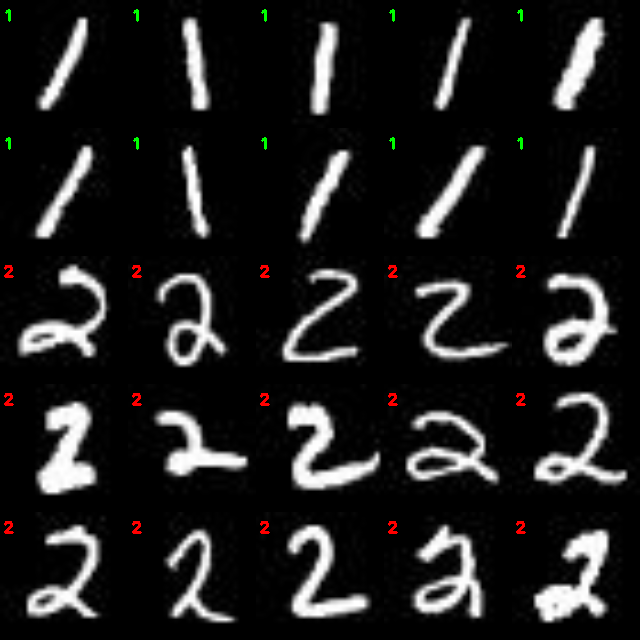

In [30]:
from imutils import build_montages

montage = build_montages(images, (128, 128), (5, 5))[0]

cv2_imshow(montage)

**Random Forest Classifier**

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

In [33]:
random_grid = {'n_estimators': n_estimators,}

In [34]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=10, n_jobs=-1)
rf_random.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 12.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [35]:
rf_random.best_params_

{'n_estimators': 1800}

In [36]:
rf = RandomForestClassifier(n_estimators=600, random_state=10)
rf.fit(X_train, y_train)
prediksi_rf = rf.predict(X_test)
cm = confusion_matrix(y_test, prediksi_rf)
cr = classification_report(y_test, prediksi_rf)
print('Nilai akurasi Random Forest pada testing data adalah {:.3f}'.format(rf.score(X_test, y_test)))
print('Nilai F1 Score Random Forest pada testing data adalah {:.3f}'.format(f1_score(y_test, prediksi_rf, average='macro')))
print('Nilai Precision Score Random Forest pada testing data adalah {:.3f}'.format(precision_score(y_test, prediksi_rf, average='macro')))
print('Nilai Recall Score Random Forest pada testing data adalah {:.3f}'.format(recall_score(y_test, prediksi_rf, average='macro')))
print()
print(cr)
print(cm)

Nilai akurasi Random Forest pada testing data adalah 0.993
Nilai F1 Score Random Forest pada testing data adalah 0.993
Nilai Precision Score Random Forest pada testing data adalah 0.993
Nilai Recall Score Random Forest pada testing data adalah 0.993

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       300
           1       1.00      0.99      1.00       300
           2       0.99      0.99      0.99       300

    accuracy                           0.99       900
   macro avg       0.99      0.99      0.99       900
weighted avg       0.99      0.99      0.99       900

[[300   0   0]
 [  0 298   2]
 [  4   0 296]]


In [37]:
testing_paths = list(paths.list_images(testingPath))
images = []

for testing_path in testing_paths[590:620]:
	image = cv.imread(testing_path)
	output = image.copy()
	output = cv.resize(output, (128, 128))

	image = preprocess(image, image_size=resize_image_size)

	if extraction_method == 'hog':
		features = quantify_image_hog(image)
	elif extraction_method == 'lbp':
		features = quantify_image_lbp(image)
   
	preds = logreg.predict([features])
	label = le.inverse_transform(preds)[0]

	color = (0, 255, 0) if label == "1" else (0, 0, 255)
	cv.putText(output, label, (3, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
	images.append(output)

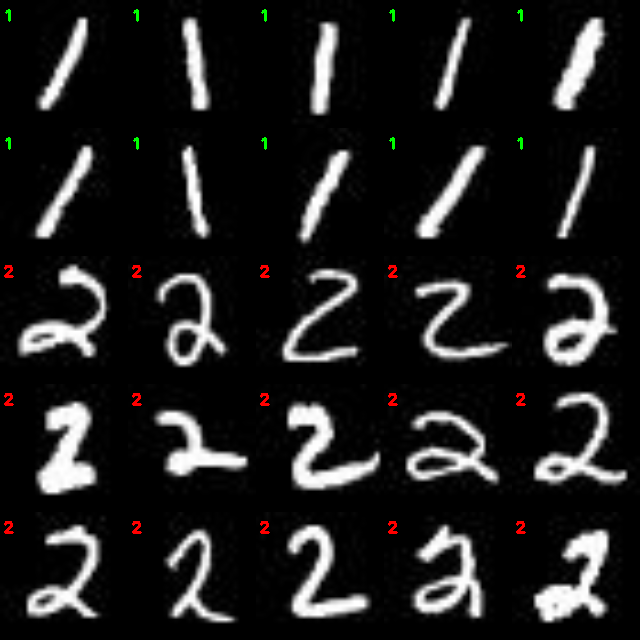

In [38]:
from imutils import build_montages

montage = build_montages(images, (128, 128), (5, 5))[0]

cv2_imshow(montage)

### **Kesimpulan**

HOG dengan Image Size 128

1. Algoritma **LinearSVC** memberikan nilai akurasi, F1_score, recall_score, dan precision_score sebesar 0.994  
2. Algoritma **Logistic Regression** memberikan nilai akurasi, F1_score, recall_score, dan precision_score sebesar 0.992
3. Algoritma **Random Forest Classifier** memberikan nilai akurasi, F1_score, recall_score, dan precision_score sebesar 0.993

Algoritma **LinearSVC** memberikan nilai tertinggi untuk setiap metrics yang digunakan pada dataset MNIST dengan image descriptor HOG dan image size 128

### **LBP dengan Image Size 128**

In [39]:
#LBP 128
resize_image_size = 128
extraction_method = 'lbp'

In [40]:
(X_train_lbp, y_train_lbp) = load_split(trainingPath, image_size=resize_image_size, extraction_method=extraction_method)
(X_test_lbp, y_test_lbp) = load_split(testingPath, image_size=resize_image_size, extraction_method=extraction_method)

print('Data berhasil diupload!')

Data berhasil diupload!


**Label Encoding**

In [41]:
le = LabelEncoder()
y_train_lbp = le.fit_transform(y_train_lbp)
y_test_lbp = le.transform(y_test_lbp)

In [42]:
print(len(y_train_lbp))
y_train_lbp

5792


array([1, 1, 1, ..., 0, 0, 0])

In [43]:
print(len(y_test_lbp))
y_test_lbp

900


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

**Machine Learning Model**

**1. LinearSVC**

In [44]:
C = [int(x) for x in np.linspace(0, 50, 25)]

In [45]:
linsvc_grid = {'C' : C}

In [46]:
linsvc_lbp = LinearSVC()
linsvc_lbp_random = RandomizedSearchCV(estimator=linsvc_lbp, param_distributions=linsvc_grid, n_iter=100, cv=3, verbose=2, random_state=10, n_jobs=-1)
linsvc_lbp_random.fit(X_train_lbp, y_train_lbp)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 25 is smaller than n_iter=100. Running 25 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   29.1s finished
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                       fit_intercept=True, intercept_scaling=1,
                                       loss='squared_hinge', max_iter=1000,
                                       multi_class='ovr', penalty='l2',
                                       random_state=None, tol=0.0001,
                                       verbose=0),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0, 2, 4, 6, 8, 10, 12, 14, 16, 18,
                                              20, 22, 25, 27, 29, 31, 33, 35,
                                              37, 39, 41, 43, 45, 47, 50]},
                   pre_dispatch='2*n_jobs', random_state=10, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [47]:
linsvc_lbp_random.best_params_

{'C': 50}

In [48]:
linsvc_lbp = LinearSVC(C=50)
linsvc_lbp.fit(X_train_lbp, y_train_lbp)
prediksi_linsvc_test_lbp = linsvc_lbp.predict(X_test_lbp)
cm_lbp = confusion_matrix(y_test_lbp, prediksi_linsvc_test_lbp)
cr_lbp = classification_report(y_test_lbp, prediksi_linsvc_test_lbp)
print('Nilai akurasi LinearSVC pada testing data adalah {:.3f}'.format(linsvc_lbp.score(X_test_lbp, y_test_lbp)))
print('Nilai F1 Score LinearSVC pada testing data adalah {:.3f}'.format(f1_score(y_test_lbp, prediksi_linsvc_test_lbp, average='macro')))
print('Nilai Precision Score LinearSVC pada testing data adalah {:.3f}'.format(precision_score(y_test_lbp, prediksi_linsvc_test_lbp, average='macro')))
print('Nilai Recall Score LinearSVC pada testing data adalah {:.3f}'.format(recall_score(y_test_lbp, prediksi_linsvc_test_lbp, average='macro')))
print()
print(cr_lbp)
print(cm_lbp)

Nilai akurasi LinearSVC pada testing data adalah 0.960
Nilai F1 Score LinearSVC pada testing data adalah 0.960
Nilai Precision Score LinearSVC pada testing data adalah 0.961
Nilai Recall Score LinearSVC pada testing data adalah 0.960

              precision    recall  f1-score   support

           0       0.98      0.91      0.94       300
           1       0.99      0.99      0.99       300
           2       0.92      0.97      0.94       300

    accuracy                           0.96       900
   macro avg       0.96      0.96      0.96       900
weighted avg       0.96      0.96      0.96       900

[[274   2  24]
 [  0 298   2]
 [  6   2 292]]


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [49]:
testing_paths = list(paths.list_images(testingPath))
images = []

for testing_path in testing_paths[590:620]:
	image = cv.imread(testing_path)
	output = image.copy()
	output = cv.resize(output, (128, 128))

	image = preprocess(image, image_size=resize_image_size)

	if extraction_method == 'hog':
		features = quantify_image_hog(image)
	elif extraction_method == 'lbp':
		features = quantify_image_lbp(image)
   
	preds = linsvc_lbp.predict([features])
	label = le.inverse_transform(preds)[0]

	color = (0, 255, 0) if label == "1" else (0, 0, 255)
	cv.putText(output, label, (3, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
	images.append(output)

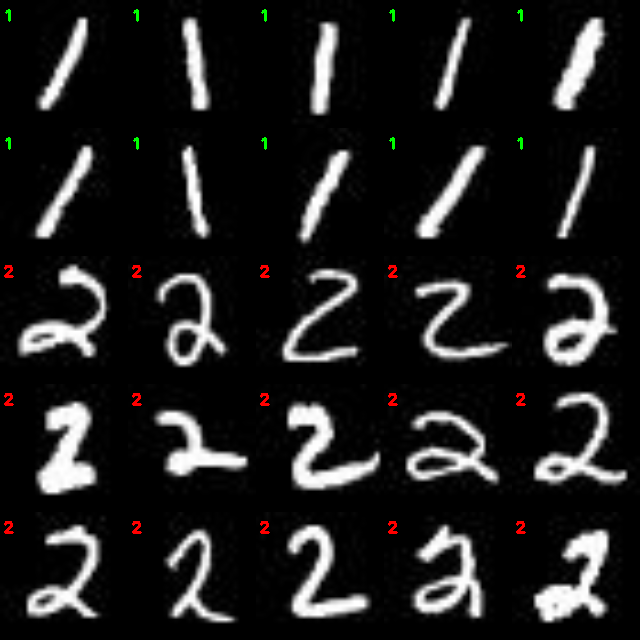

In [50]:
from imutils import build_montages

montage = build_montages(images, (128, 128), (5, 5))[0]

cv2_imshow(montage)

**2. Logistic Regression**

In [51]:
penalty = ['l1', 'l2']
C = np.logspace(-4, 4, 20)

In [52]:
logreg_grid = {'penalty' : penalty, 'C' : C}

In [53]:
logreg_lbp = LogisticRegression()
log_lbp_random = RandomizedSearchCV(estimator=logreg_lbp, param_distributions=logreg_grid, n_iter=100, cv=3, verbose=2, random_state=10, n_jobs=-1)
log_lbp_random.fit(X_train_lbp, y_train_lbp)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 40 is smaller than n_iter=100. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    3.9s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'C': a...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+

In [54]:
log_lbp_random.best_params_

{'C': 10000.0, 'penalty': 'l2'}

In [55]:
logreg_lbp = LogisticRegression(C=10000.0, penalty='l2')
logreg_lbp.fit(X_train_lbp, y_train_lbp)
prediksi_logreg_lbp = logreg_lbp.predict(X_test_lbp)
cm_lbp = confusion_matrix(y_test_lbp, prediksi_logreg_lbp)
cr_lbp = classification_report(y_test_lbp, prediksi_logreg_lbp)
print('Nilai akurasi Logistic Regression dengan pada testing data adalah {:.3f}'.format(logreg_lbp.score(X_test_lbp, y_test_lbp)))
print('Nilai F1 Score Logistic Regression dengan pada testing data adalah {:.3f}'.format(f1_score(y_test_lbp, prediksi_logreg_lbp, average='macro')))
print('Nilai Precision Score Logistic Regression dengan pada testing data adalah {:.3f}'.format(precision_score(y_test_lbp, prediksi_logreg_lbp, average='macro')))
print('Nilai Recall Score Logistic Regression dengan pada testing data adalah {:.3f}'.format(recall_score(y_test_lbp, prediksi_logreg_lbp, average='macro')))
print()
print(cr_lbp)
print(cm_lbp)

Nilai akurasi Logistic Regression dengan pada testing data adalah 0.963
Nilai F1 Score Logistic Regression dengan pada testing data adalah 0.963
Nilai Precision Score Logistic Regression dengan pada testing data adalah 0.964
Nilai Recall Score Logistic Regression dengan pada testing data adalah 0.963

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       300
           1       0.99      0.99      0.99       300
           2       0.94      0.96      0.95       300

    accuracy                           0.96       900
   macro avg       0.96      0.96      0.96       900
weighted avg       0.96      0.96      0.96       900

[[282   1  17]
 [  0 297   3]
 [ 11   1 288]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [56]:
testing_paths = list(paths.list_images(testingPath))
images = []

for testing_path in testing_paths[590:620]:
	image = cv.imread(testing_path)
	output = image.copy()
	output = cv.resize(output, (128, 128))

	image = preprocess(image, image_size=resize_image_size)

	if extraction_method == 'hog':
		features = quantify_image_hog(image)
	elif extraction_method == 'lbp':
		features = quantify_image_lbp(image)
   
	preds = logreg_lbp.predict([features])
	label = le.inverse_transform(preds)[0]

	color = (0, 255, 0) if label == "1" else (0, 0, 255)
	cv.putText(output, label, (3, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
	images.append(output)

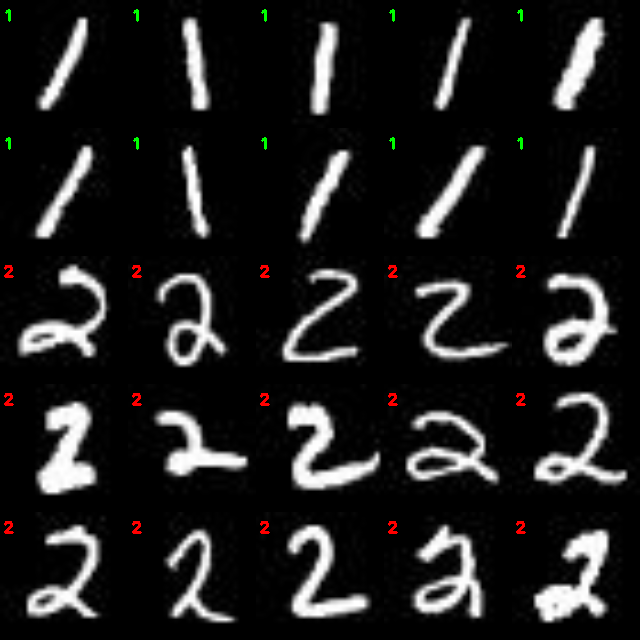

In [57]:
from imutils import build_montages

montage = build_montages(images, (128, 128), (5, 5))[0]

cv2_imshow(montage)

**Random Forest Classifiers**

In [58]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

In [59]:
rf_lbp_grid = {'n_estimators' : n_estimators}

print(rf_lbp_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [60]:
rf_lbp = RandomForestClassifier()
rf_lbp_random = RandomizedSearchCV(estimator=rf_lbp, param_distributions=rf_lbp_grid, n_iter=100, cv=3, verbose=2, random_state=10, n_jobs=-1)
rf_lbp_random.fit(X_train_lbp, y_train_lbp)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [61]:
rf_lbp_random.best_params_

{'n_estimators': 400}

In [62]:
rf_lbp = RandomForestClassifier(n_estimators=1400, random_state=10)
rf_lbp.fit(X_train_lbp, y_train_lbp)
prediksi_rf_lbp = rf_lbp.predict(X_test_lbp)
cm_lbp = confusion_matrix(y_test_lbp, prediksi_rf_lbp)
cr_lbp = classification_report(y_test_lbp, prediksi_rf_lbp)
print('Nilai akurasi Random Forest pada testing data adalah {:.3f}'.format(rf_lbp.score(X_test_lbp, y_test_lbp)))
print('Nilai F1 Score Random Forest pada testing data adalah {:.3f}'.format(f1_score(y_test_lbp, prediksi_rf_lbp, average='macro')))
print('Nilai Precision Score Random Forest pada testing data adalah {:.3f}'.format(precision_score(y_test_lbp, prediksi_rf_lbp, average='macro')))
print('Nilai Recall Score Random Forest pada testing data adalah {:.3f}'.format(recall_score(y_test_lbp, prediksi_rf_lbp, average='macro')))
print()
print(cr_lbp)
print(cm_lbp)

Nilai akurasi Random Forest pada testing data adalah 0.967
Nilai F1 Score Random Forest pada testing data adalah 0.967
Nilai Precision Score Random Forest pada testing data adalah 0.967
Nilai Recall Score Random Forest pada testing data adalah 0.967

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       300
           1       1.00      1.00      1.00       300
           2       0.93      0.98      0.95       300

    accuracy                           0.97       900
   macro avg       0.97      0.97      0.97       900
weighted avg       0.97      0.97      0.97       900

[[278   1  21]
 [  0 299   1]
 [  7   0 293]]


In [63]:
testing_paths = list(paths.list_images(testingPath))
images = []

for testing_path in testing_paths[590:620]:
	image = cv.imread(testing_path)
	output = image.copy()
	output = cv.resize(output, (128, 128))

	image = preprocess(image, image_size=resize_image_size)

	if extraction_method == 'hog':
		features = quantify_image_hog(image)
	elif extraction_method == 'lbp':
		features = quantify_image_lbp(image)
   
	preds = rf_lbp.predict([features])
	label = le.inverse_transform(preds)[0]

	color = (0, 255, 0) if label == "1" else (0, 0, 255)
	cv.putText(output, label, (3, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
	images.append(output)

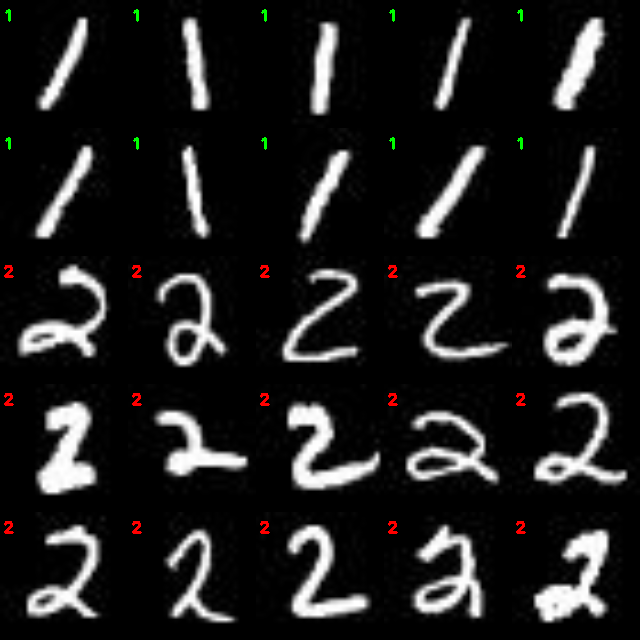

In [64]:
from imutils import build_montages

montage = build_montages(images, (128, 128), (5, 5))[0]

cv2_imshow(montage)

### **Kesimpulan**

LBP dengan Image Size 128

1. Algoritma **LinearSVC** memberikan nilai akurasi, F1_score, recall_score sebesar 0.96 serta nilai precision_score sebesar 0.961  
2. Algoritma **Logistic Regression** memberikan nilai akurasi, F1_score, dan recall_score sebesar 0.963 serta nilai precision_score sebesar 0.964
3. Algoritma **Random Forest Classifier** memberikan nilai akurasi, F1_score, recall_score, dan precision_score sebesar 0.967

Algoritma **Random Forest Classifier** memberikan nilai tertinggi untuk setiap metrics yang digunakan pada dataset MNIST dengan image descriptor LBP dan image size 128

## **MNIST dengan Data Tambahan**

Akan digunakan image descriptor HOG dengan image size 128 dengan algoritma LinearSVC dan image descriptor LBP dengan image size 128 dengan algoritma Random Forest

### **HOG dengan Image Size 128**

In [67]:
dataset_dir = 'drive/My Drive/Colab Test (Bootcamp ML 2020)/numbers_dataset'

trainingPath = os.path.join(dataset_dir, 'training')
testingPath = os.path.join(dataset_dir, 'testing baru')

In [66]:
#HOG 128
resize_image_size = 128
extraction_method = 'hog'

In [68]:
(X_train, y_train) = load_split(trainingPath, image_size=resize_image_size, extraction_method=extraction_method)
(X_test, y_test) = load_split(testingPath, image_size=resize_image_size, extraction_method=extraction_method)

print('Data berhasil diupload!')

Data berhasil diupload!


**Label Encoding**

In [69]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [70]:
y_train

array([1, 1, 1, ..., 0, 0, 0])

In [71]:
y_test

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0])

**Machine Learning Model Using LinearSVC**

In [74]:
C = [int(x) for x in np.linspace(0, 50, 25)]

In [75]:
linsvc_grid = {'C' : C}

In [76]:
linsvc = LinearSVC()
lin_random = RandomizedSearchCV(estimator=linsvc, param_distributions=linsvc_grid, n_iter=100, cv=3, verbose=2, random_state=10, n_jobs=-1)
lin_random.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 25 is smaller than n_iter=100. Running 25 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   17.6s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                       fit_intercept=True, intercept_scaling=1,
                                       loss='squared_hinge', max_iter=1000,
                                       multi_class='ovr', penalty='l2',
                                       random_state=None, tol=0.0001,
                                       verbose=0),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0, 2, 4, 6, 8, 10, 12, 14, 16, 18,
                                              20, 22, 25, 27, 29, 31, 33, 35,
                                              37, 39, 41, 43, 45, 47, 50]},
                   pre_dispatch='2*n_jobs', random_state=10, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [77]:
lin_random.best_params_

{'C': 2}

In [78]:
lin_svc = LinearSVC(C=2)
lin_svc.fit(X_train, y_train)
prediksi_linsvc = lin_svc.predict(X_test)
cm = confusion_matrix(y_test, prediksi_linsvc)
cr = classification_report(y_test, prediksi_linsvc)
print('Nilai akurasi LinearSVC pada testing data adalah {:.3f}'.format(lin_svc.score(X_test, y_test)))
print('Nilai F1 Score LinearSVC pada testing data adalah {:.3f}'.format(f1_score(y_test, prediksi_linsvc, average='macro')))
print('Nilai Precision Score LinearSVC pada testing data adalah {:.3f}'.format(precision_score(y_test, prediksi_linsvc, average='macro')))
print('Nilai Recall Score LinearSVC pada testing data adalah {:.3f}'.format(recall_score(y_test, prediksi_linsvc, average='macro')))
print()
print(cr)
print(cm)

Nilai akurasi LinearSVC pada testing data adalah 0.875
Nilai F1 Score LinearSVC pada testing data adalah 0.874
Nilai Precision Score LinearSVC pada testing data adalah 0.889
Nilai Recall Score LinearSVC pada testing data adalah 0.875

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.89      1.00      0.94         8
           2       0.78      0.88      0.82         8

    accuracy                           0.88        24
   macro avg       0.89      0.88      0.87        24
weighted avg       0.89      0.88      0.87        24

[[6 0 2]
 [0 8 0]
 [0 1 7]]


In [82]:
testing_paths = list(paths.list_images(testingPath))
images = []

for testing_path in testing_paths[:25]:
	image = cv.imread(testing_path)
	output = image.copy()
	output = cv.resize(output, (128, 128))

	image = preprocess(image, image_size=resize_image_size)

	if extraction_method == 'hog':
		features = quantify_image_hog(image)
	elif extraction_method == 'lbp':
		features = quantify_image_lbp(image)
   
	preds = lin_svc.predict([features])
	label = le.inverse_transform(preds)[0]

	color = (0, 255, 0) if label == "1" else (0, 0, 255)
	cv.putText(output, label, (3, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
	images.append(output)

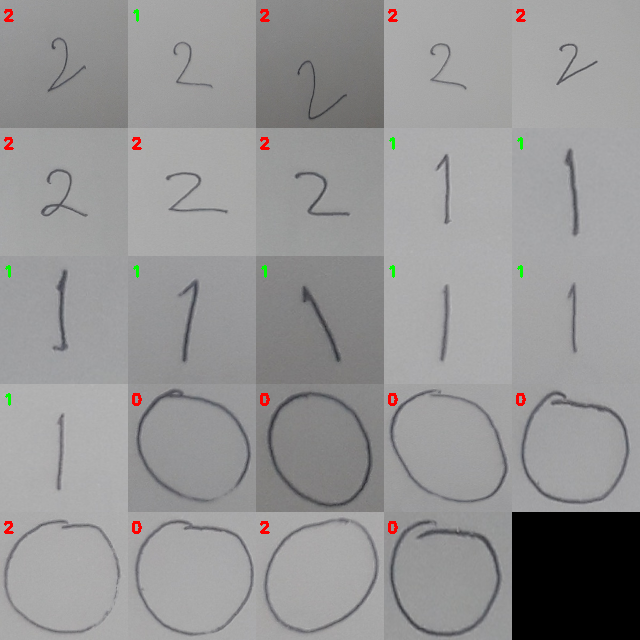

In [83]:
from imutils import build_montages

montage = build_montages(images, (128, 128), (5, 5))[0]

cv2_imshow(montage)

### **LBP dengan Image Size 128**

In [84]:
#LBP 128
resize_image_size = 128
extraction_method = 'lbp'

In [101]:
(X_train_lbp, y_train_lbp) = load_split(trainingPath, image_size=resize_image_size, extraction_method=extraction_method)
(X_test_lbp, y_test_lbp) = load_split(testingPath, image_size=resize_image_size, extraction_method=extraction_method)

print('Data berhasil diupload!')

Data berhasil diupload!


In [102]:
le = LabelEncoder()
y_train_lbp = le.fit_transform(y_train_lbp)
y_test_lbp = le.transform(y_test_lbp)

In [103]:
y_train_lbp

array([1, 1, 1, ..., 0, 0, 0])

In [104]:
y_test_lbp

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0])

**Machine Learning Model Using Random Forest**

In [105]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

In [106]:
rf_lbp_grid = {'n_estimators' : n_estimators}

print(rf_lbp_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [107]:
rf_lbp = RandomForestClassifier()
rf_lbp_random = RandomizedSearchCV(estimator=rf_lbp, param_distributions=rf_lbp_grid, n_iter=100, cv=3, verbose=2, random_state=10, n_jobs=-1)
rf_lbp_random.fit(X_train_lbp, y_train_lbp)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 10 is smaller than n_iter=100. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [108]:
rf_lbp_random.best_params_

{'n_estimators': 1200}

In [110]:
rf_lbp = RandomForestClassifier(n_estimators=1200, random_state=10)
rf_lbp.fit(X_train_lbp, y_train_lbp)
prediksi_rf_lbp = rf_lbp.predict(X_test_lbp)
cm_lbp = confusion_matrix(y_test_lbp, prediksi_rf_lbp)
cr_lbp = classification_report(y_test_lbp, prediksi_rf_lbp)
print('Nilai akurasi Random Forest pada testing data adalah {:.3f}'.format(rf_lbp.score(X_test_lbp, y_test_lbp)))
print('Nilai F1 Score Random Forest pada testing data adalah {:.3f}'.format(f1_score(y_test_lbp, prediksi_rf_lbp, average='macro')))
print('Nilai Precision Score Random Forest pada testing data adalah {:.3f}'.format(precision_score(y_test_lbp, prediksi_rf_lbp, average='macro')))
print('Nilai Recall Score Random Forest pada testing data adalah {:.3f}'.format(recall_score(y_test_lbp, prediksi_rf_lbp, average='macro')))
print()
print(cr_lbp)
print(cm_lbp)

Nilai akurasi Random Forest pada testing data adalah 0.333
Nilai F1 Score Random Forest pada testing data adalah 0.167
Nilai Precision Score Random Forest pada testing data adalah 0.111
Nilai Recall Score Random Forest pada testing data adalah 0.333

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.33      1.00      0.50         8
           2       0.00      0.00      0.00         8

    accuracy                           0.33        24
   macro avg       0.11      0.33      0.17        24
weighted avg       0.11      0.33      0.17        24

[[0 8 0]
 [0 8 0]
 [0 8 0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [111]:
testing_paths = list(paths.list_images(testingPath))
images = []

for testing_path in testing_paths[:25]:
	image = cv.imread(testing_path)
	output = image.copy()
	output = cv.resize(output, (128, 128))

	image = preprocess(image, image_size=resize_image_size)

	if extraction_method == 'hog':
		features = quantify_image_hog(image)
	elif extraction_method == 'lbp':
		features = quantify_image_lbp(image)
   
	preds = rf_lbp.predict([features])
	label = le.inverse_transform(preds)[0]

	color = (0, 255, 0) if label == "1" else (0, 0, 255)
	cv.putText(output, label, (3, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
	images.append(output)

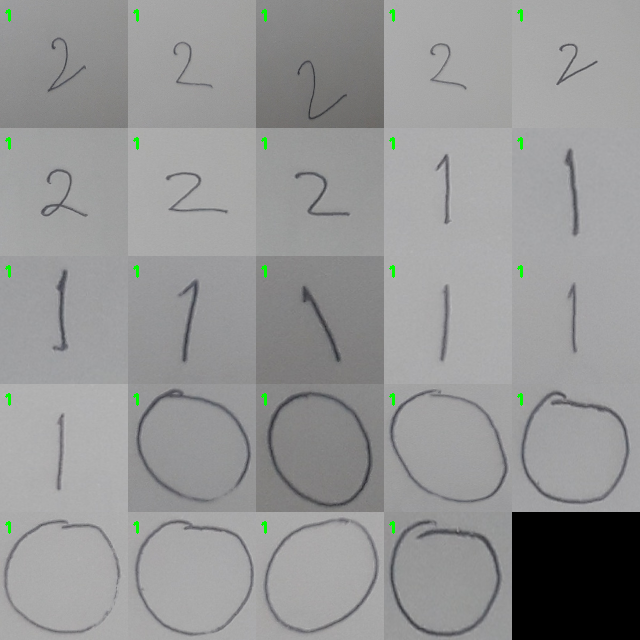

In [112]:
from imutils import build_montages

montage = build_montages(images, (128, 128), (5, 5))[0]

cv2_imshow(montage)

Dengan memakai image descriptor **HOG** dan **image size 128** serta algoritma **LinearSVC** (algoritma terbaik), hasil testing datanya mengalami penurunan akurasi serta metric-metric lainnya saat diuji ke dalam data tambahan

1. Nilai akurasi LinearSVC pada testing data adalah 0.875
2. Nilai F1 Score LinearSVC pada testing data adalah 0.874
3. Nilai Precision Score LinearSVC pada testing data adalah 0.889
4. Nilai Recall Score LinearSVC pada testing data adalah 0.875

Akan tetapi nilainya masih berada diatas 0.85 dan ini masih tergolong baik.

Dengan memakai image descriptor **LBP** dan **image size 128** serta algoritma **Random Forest** (algoritma terbaik), hasil testing datanya mengalami penurunan yang sangat besar pada akurasi serta metric-metric lainnya saat diuji ke dalam data tambahan

1. Nilai akurasi Random Forest pada testing data adalah 0.333
2. Nilai F1 Score Random Forest pada testing data adalah 0.167
3. Nilai Precision Score Random Forest pada testing data adalah 0.111
4. Nilai Recall Score Random Forest pada testing data adalah 0.333

Nilainya berada di rentang 0.1-0.3 dan nilai ini sangat buruk dimana semua angka di dataset tambahan ini dideteksi sebagai angka 1.

Buruknya hasil testing ini bisa disebabkan karena image descriptor yang digunakan yakni LBP menghasilkan dimensi yang lebih kecil dibandingkan dengan HOG sehingga mempengaruhi hasil testingnya